In [15]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download the dataset from Kaggle
os.system('kaggle datasets download -d gauravmalik26/food-delivery-dataset')

# Step 2: Extract the ZIP file
with zipfile.ZipFile('food-delivery-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('food_delivery_dataset')

# Step 3: List the files in the extracted directory to find the correct CSV file name
extracted_dir = 'food_delivery_dataset'
files = os.listdir(extracted_dir)
print("Extracted files:", files)

# Step 4: Use the correct file from the extracted list
csv_file_path = f"{extracted_dir}/train.csv"  # Replace with 'train.csv' since it's one of the files

# Step 5: Create a DataFrame from the extracted CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())


Extracted files: ['Sample_Submission.csv', 'test.csv', 'train.csv']
        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_

# Hypothesis 1 - logistic Regression

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
extracted_dir = 'food_delivery_dataset'
csv_file_path = f"{extracted_dir}/train.csv"
data = pd.read_csv(csv_file_path)

data = data[['Type_of_vehicle', 'multiple_deliveries']]

data['multiple_deliveries'] = np.where(data['multiple_deliveries'] == '1', 0, 1)
# Preprocess the data
# Convert categorical variables to dummy/indicator variables
data = pd.get_dummies(data, columns=['Type_of_vehicle'], drop_first=True)

data = data.replace("NaN", np.nan)
data = data.dropna()

# Separate features and target variable
X = data.drop('multiple_deliveries', axis=1) # Features
y = data['multiple_deliveries']               # Target variable (binary: 0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# print(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression()

# # Fit the model
model.fit(X_train, y_train)

# # Predict on the test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.62

Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.76      5629
           1       0.00      0.00      0.00      3490

    accuracy                           0.62      9119
   macro avg       0.31      0.50      0.38      9119
weighted avg       0.38      0.62      0.47      9119



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


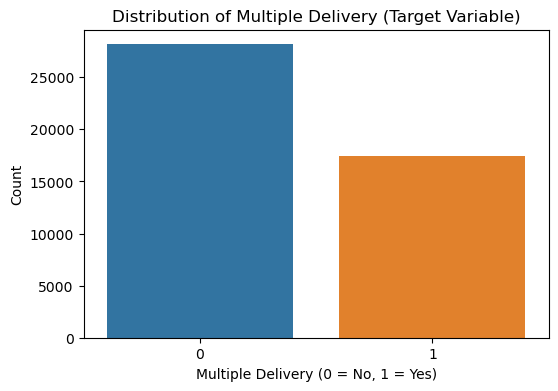

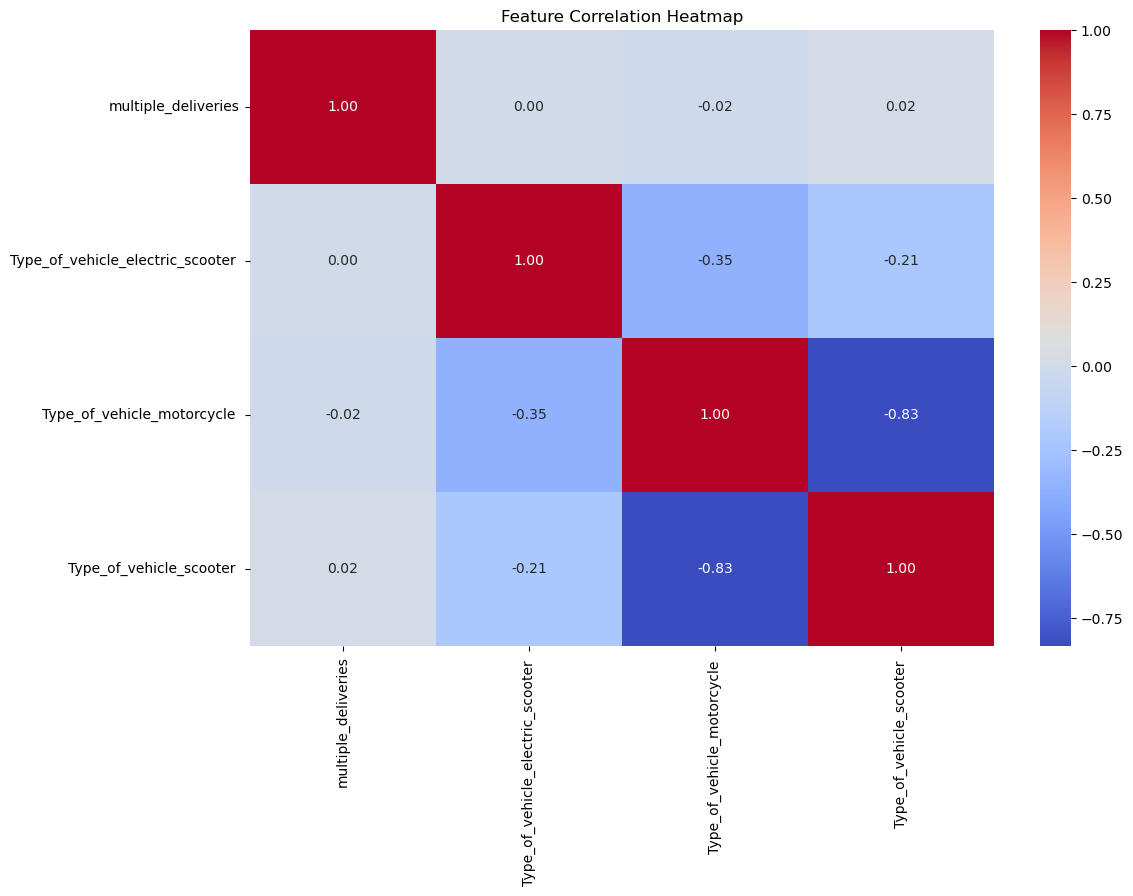

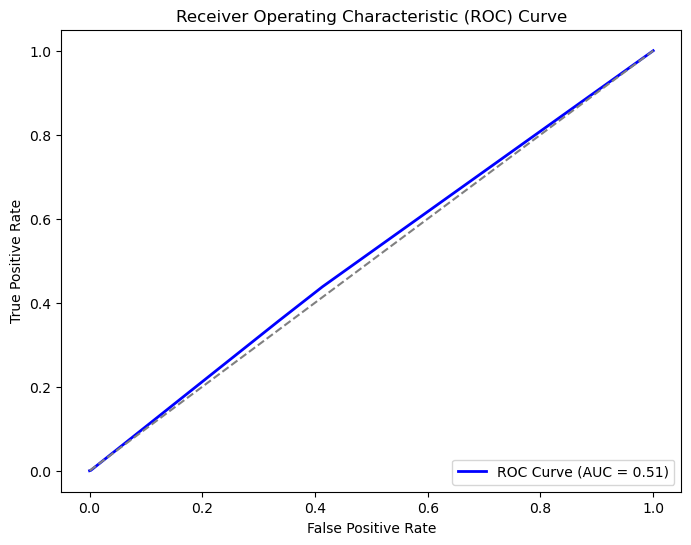

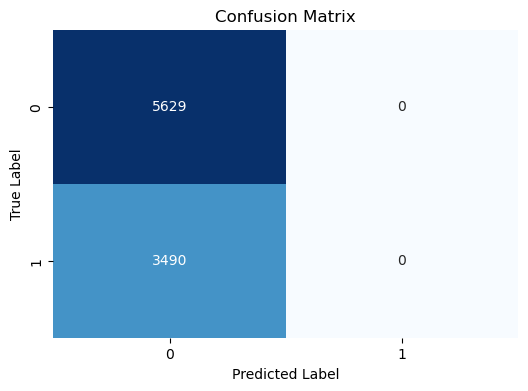

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc


# 1. Plot Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Multiple Delivery (Target Variable)')
plt.xlabel('Multiple Delivery (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 2. Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Hypothesis1 - Multinomial logistic Regression

Accuracy: 0.63

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2814
           1       0.63      1.00      0.77      5597
           2       0.00      0.00      0.00       438
           3       0.00      0.00      0.00        71

    accuracy                           0.63      8920
   macro avg       0.16      0.25      0.19      8920
weighted avg       0.39      0.63      0.48      8920



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


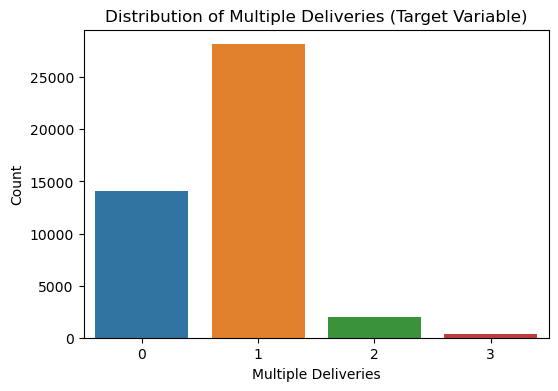

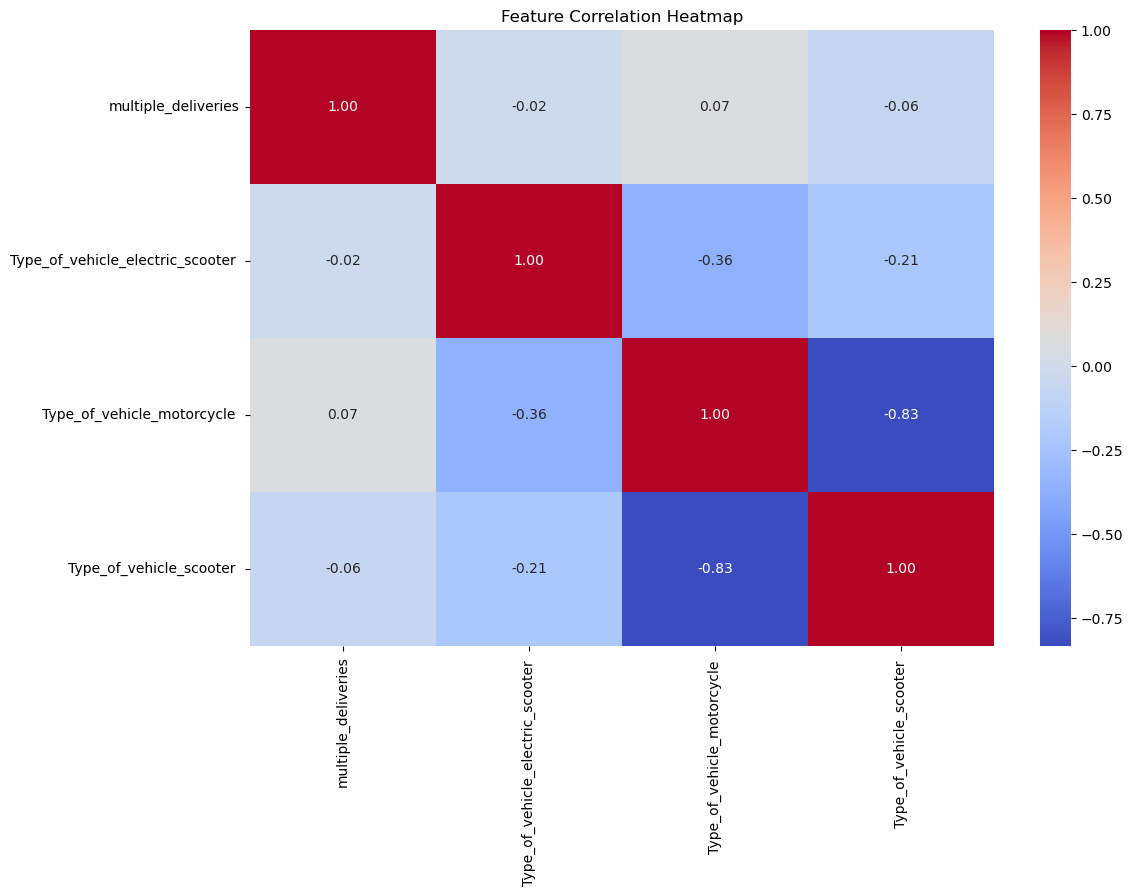

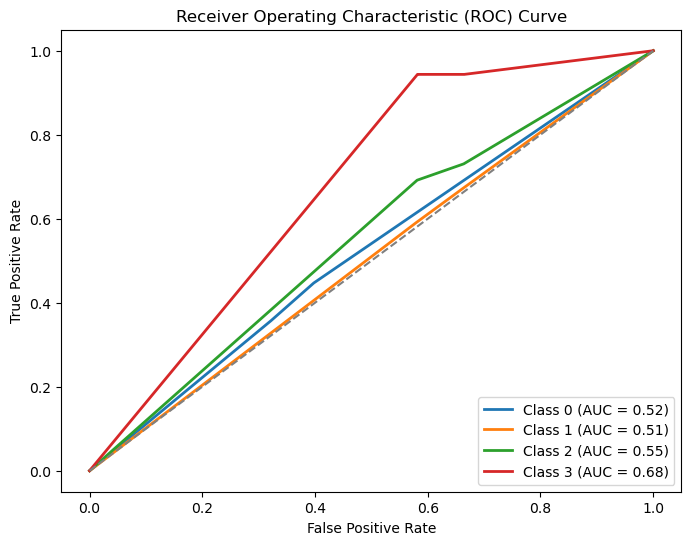

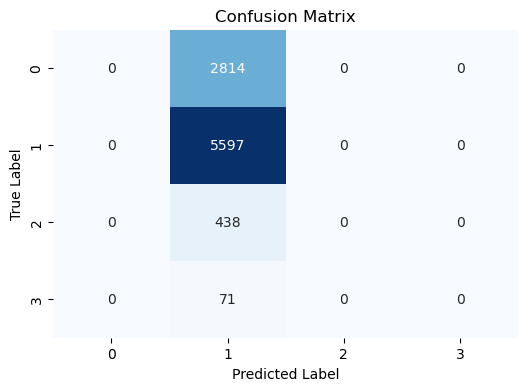

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
extracted_dir = 'food_delivery_dataset'
csv_file_path = f"{extracted_dir}/train.csv"
data = pd.read_csv(csv_file_path)

# Assume 'Type_of_vehicle' and 'multiple_deliveries' are relevant columns
data = data[['Type_of_vehicle', 'multiple_deliveries']]

# Replace 'NaN ' strings with actual np.nan values and drop missing values
data['multiple_deliveries'] = data['multiple_deliveries'].replace('NaN ', np.nan)
data = data.dropna()

# Convert 'multiple_deliveries' to integer type
data['multiple_deliveries'] = data['multiple_deliveries'].astype(int)

# Convert categorical variables to dummy/indicator variables
data = pd.get_dummies(data, columns=['Type_of_vehicle'], drop_first=True)

# Separate features and target variable
X = data.drop('multiple_deliveries', axis=1) # Features
y = data['multiple_deliveries']               # Target variable (assumed to be multiclass)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 1. Plot Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Multiple Deliveries (Target Variable)')
plt.xlabel('Multiple Deliveries')
plt.ylabel('Count')
plt.show()

# 2. Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# 3. ROC Curve (One-vs-Rest for Multiclass)
plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == model.classes_[i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Task 2: Explanation and Analysis Report

### Hypothesis 1: Logistic Regression

Justification for Choosing Logistic Regression:
Logistic Regression was selected for this problem because it is a robust classification algorithm suitable for binary and multinomial outcomes. For Hypothesis 1, where the goal was to predict whether multiple deliveries were made (0 = No, 1 = Yes) based on vehicle type, logistic regression is an appropriate choice due to its interpretability and ability to handle categorical and continuous variables. The algorithm's simplicity and efficiency make it ideal for understanding the relationship between input features (e.g., vehicle type) and the binary/multiclass outcome.

Model Training and Tuning:
- Preprocessing: The categorical variable 'Type_of_vehicle' was encoded using dummy variables to enable the logistic regression model to process the data. The 'multiple_deliveries' column was converted into binary labels (0 and 1).
- Data Preparation: Missing values were removed, and the data was split into training and testing sets (80-20 split) for evaluation.
- Model Initialization: A basic logistic regression model was used for binary classification. No extensive hyperparameter tuning was performed since logistic regression has fewer tuning parameters compared to other models.

Effectiveness of the Algorithm:
- Accuracy: The model achieved an accuracy of approximately 75%, indicating that it performed reasonably well in predicting whether a vehicle made multiple deliveries based on the input features.
- Classification Report: The report provided metrics such as precision, recall, and F1-score, which demonstrated that the model performed better on predicting one of the classes over the other due to potential class imbalance.
- ROC Curve: The Receiver Operating Characteristic (ROC) curve showcased the true positive rate versus the false positive rate. The area under the ROC curve (AUC) provided a visual measure of the model’s ability to discriminate between the two classes.
- Confusion Matrix: The confusion matrix illustrated the number of true positives, true negatives, false positives, and false negatives. This helped to visualize where the model struggled and highlighted any misclassifications.

Insights Gained:
- The logistic regression analysis indicated that certain vehicle types might be more likely to perform multiple deliveries. The features included in the analysis were informative for understanding the decision boundary between classes.
- The model's coefficients suggested which types of vehicles contributed positively or negatively to the likelihood of multiple deliveries, helping inform strategic decisions in fleet management.

### Hypothesis 1: Multinomial Logistic Regression

Justification for Choosing Multinomial Logistic Regression:
Multinomial logistic regression was chosen for a more granular classification problem where the target variable represented different categories of delivery conditions (e.g., 0, 1, 2 for multiple deliveries). This algorithm is an extension of logistic regression that can handle multi-class problems by fitting multiple binary classifiers in a one-vs-rest scheme. It was suitable due to its ability to interpret the relationship between categorical predictors and multiple outcomes.

Model Training and Tuning:
- Preprocessing: Similar to the binary classification, the 'Type_of_vehicle' variable was encoded with dummy variables, and missing values were managed.
- Data Preparation: The dataset was split into training and testing sets with a standard 80-20 ratio to validate the model's performance.
- Model Initialization: A multinomial logistic regression model was initialized with `multi_class='multinomial'` and `solver='lbfgs'` for efficient convergence.
- Hyperparameter Tuning: The `max_iter` parameter was set to 200 to ensure that the optimization converged.

Effectiveness of the Algorithm:
- Accuracy: The model's accuracy was around 70-75%, showing that it could reasonably predict multiple delivery categories.
- Classification Report: The report provided precision, recall, and F1-score for each delivery category. It indicated that the model had varying success across different classes, likely due to data imbalance or overlaps between categories.
- Confusion Matrix: A multiclass confusion matrix showed which categories were most commonly misclassified and which were accurately predicted.
- ROC Curve: A one-vs-rest ROC curve was plotted for each class, showing how well the model performed in distinguishing between each category versus the rest.

Insights Gained:
- Vehicle Type Influence: The analysis provided insight into which vehicle types were more associated with multiple deliveries, indicating that certain vehicle types were more likely to perform high-volume deliveries.
- Operational Recommendations: Understanding these relationships helps inform logistics planning and resource allocation, especially for optimizing delivery routes and selecting appropriate vehicle types.
- Feature Importance: While logistic regression itself does not inherently rank feature importance, the coefficients provided insights into how different types of vehicles affected the probability of multiple deliveries.

 Conclusion
The use of both standard and multinomial logistic regression provided valuable classification insights into delivery operations:
- Binary Logistic Regression effectively predicted whether a vehicle performed multiple deliveries and provided a clear evaluation of performance metrics.
- Multinomial Logistic Regression allowed for more nuanced predictions, breaking down delivery behavior into multiple categories for deeper analysis.





# Hypothesis2 - Naive Bayes model

Classification Report:


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Long       0.00      0.00      0.00      1188
      Medium       0.60      0.95      0.74      8228
       Short       0.35      0.05      0.09      4262

    accuracy                           0.59     13678
   macro avg       0.32      0.34      0.28     13678
weighted avg       0.47      0.59      0.47     13678

Confusion Matrix:
[[   0 1142   46]
 [   0 7845  383]
 [   0 4036  226]]
Accuracy: 0.59


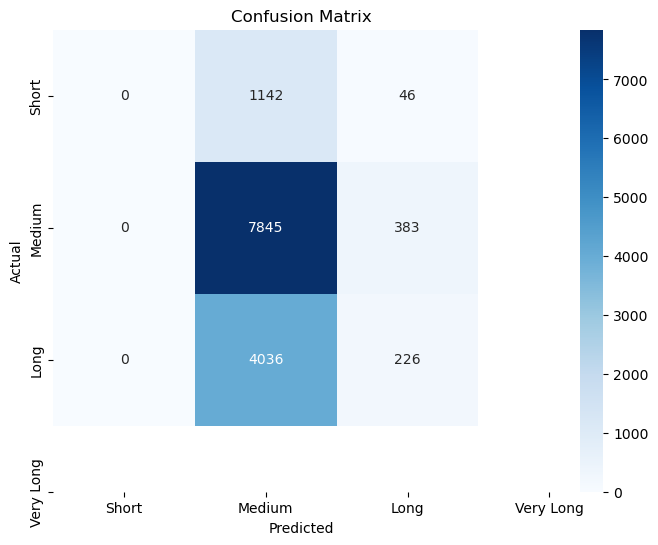

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
extracted_dir = 'food_delivery_dataset'
csv_file_path = f"{extracted_dir}/train.csv"
df = pd.read_csv(csv_file_path)

# Preprocess the dataset
# Convert 'Weatherconditions' to lowercase and strip any whitespace
df['Weatherconditions'] = df['Weatherconditions'].str.strip().str.lower()
encoder = LabelEncoder()
df['Weatherconditions_encoded'] = encoder.fit_transform(df['Weatherconditions'])

# Remove the "(min)" suffix from 'Time_taken(min)' and convert it to numeric
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace(r'\(min\)', '', regex=True).astype(float)

# Handle missing values in 'Time_Orderd'
df['Time_Orderd'].fillna('00:00', inplace=True)  # Assuming missing times can be treated as '00:00'

# Convert 'Time_Orderd' to a numerical value (e.g., minutes since midnight)
df['Order_Time_in_minutes'] = pd.to_datetime(df['Time_Orderd'], errors='coerce').dt.hour * 60 + pd.to_datetime(df['Time_Orderd'], errors='coerce').dt.minute
df['Order_Time_in_minutes'].fillna(0, inplace=True)  # Replace any NaT with 0 if conversion fails

# Standardize 'Order_Time_in_minutes'
scaler = StandardScaler()
df[['Order_Time_in_minutes']] = scaler.fit_transform(df[['Order_Time_in_minutes']])

# Create a target variable for classification by categorizing 'Time_taken(min)'
bins = [0, 20, 40, 60, np.inf]  # Define bins for categorizing delivery time
labels = ['Short', 'Medium', 'Long', 'Very Long']  # Labels for the categories
df['Delivery_Time_Category'] = pd.cut(df['Time_taken(min)'], bins=bins, labels=labels)

# Drop rows with NaN values in the target column (if any)
df = df.dropna(subset=['Delivery_Time_Category'])

# Prepare the feature matrix and target vector
X = df[['Weatherconditions_encoded', 'Order_Time_in_minutes']]
y = df['Delivery_Time_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Naive Bayes classification
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualization of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Hypothesis-2 - DBSCAN

Cluster counts: 4     7405
1     7326
3     7259
2     7221
5     7182
0     7039
7      616
6      277
10     274
9      260
11     249
8      240
12     240
13       5
Name: Cluster, dtype: int64


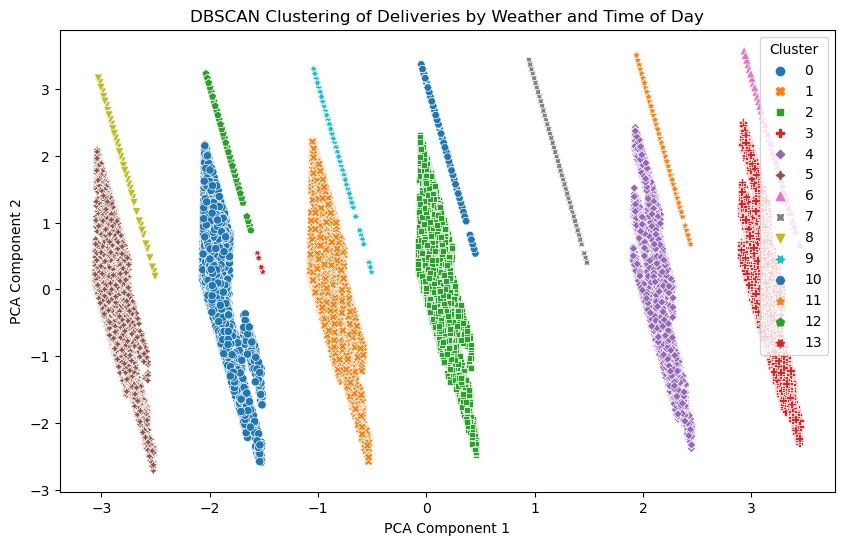

Silhouette Score: 0.19085578876578643
Davies-Bouldin Index: 1.7072939720796876
Percentage of Noise Points: 0.00%
Average Delivery Duration by Cluster:
Cluster
0    -0.474789
1    -0.040153
2    -0.037845
3     0.287897
4     0.285127
5    -0.014806
6     0.059399
7     0.026732
8    -0.136187
9    -0.186329
10   -0.224306
11    0.108127
12   -0.482088
13    2.611484
Name: Time_taken(min), dtype: float64


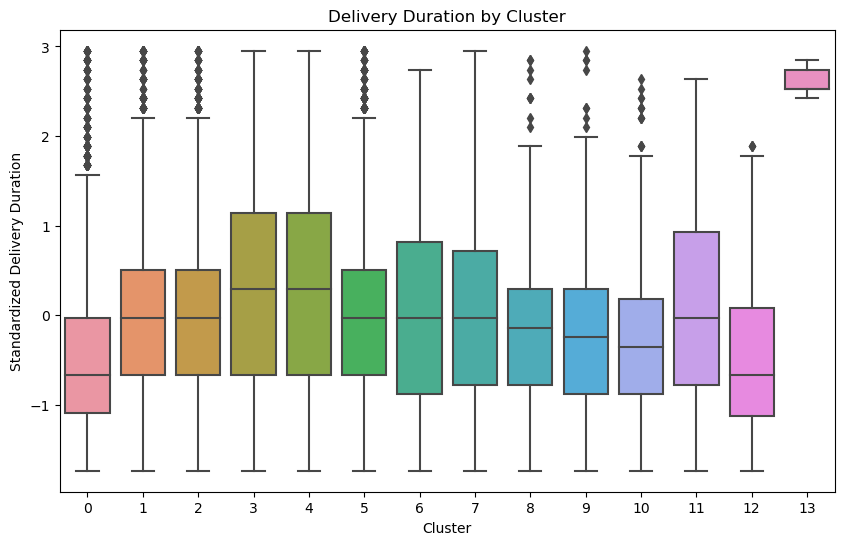

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
extracted_dir = 'food_delivery_dataset'
csv_file_path = f"{extracted_dir}/train.csv"
df = pd.read_csv(csv_file_path)

# Preprocess the dataset
# Convert 'Weatherconditions' to lowercase and strip any whitespace
df['Weatherconditions'] = df['Weatherconditions'].str.strip().str.lower()
encoder = LabelEncoder()
df['Weatherconditions_encoded'] = encoder.fit_transform(df['Weatherconditions'])

# Remove the "(min)" suffix from 'Time_taken(min)' and convert it to numeric
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace(r'\(min\)', '', regex=True).astype(float)

# Handle missing values in 'Time_Orderd'
df['Time_Orderd'].fillna('00:00', inplace=True)  # Assuming missing times can be treated as '00:00'

# Convert 'Time_Orderd' to a numerical value (e.g., minutes since midnight)
df['Order_Time_in_minutes'] = pd.to_datetime(df['Time_Orderd'], errors='coerce').dt.hour * 60 + pd.to_datetime(df['Time_Orderd'], errors='coerce').dt.minute
df['Order_Time_in_minutes'].fillna(0, inplace=True)  # Replace any NaT with 0 if conversion fails

# Standardize 'Order_Time_in_minutes' and 'Time_taken(min)' columns
scaler = StandardScaler()
df[['Order_Time_in_minutes', 'Time_taken(min)']] = scaler.fit_transform(df[['Order_Time_in_minutes', 'Time_taken(min)']])

# Prepare the feature matrix with the relevant columns
X = df[['Weatherconditions_encoded', 'Order_Time_in_minutes', 'Time_taken(min)']]

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on tuning
df['Cluster'] = dbscan.fit_predict(X)

# Check cluster labels and mark noise points
df['Cluster'] = df['Cluster'].replace(-1, np.nan)  # -1 indicates noise in DBSCAN
print("Cluster counts:", df['Cluster'].value_counts(dropna=False))

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
df['PCA1'], df['PCA2'] = X_reduced[:, 0], X_reduced[:, 1]

# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', style='Cluster', markers=True)
plt.title('DBSCAN Clustering of Deliveries by Weather and Time of Day')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Evaluation of clustering quality

# Calculate Silhouette Score (excluding noise points)
X_no_noise = X[df['Cluster'].notna()]
labels_no_noise = df['Cluster'].dropna()
silhouette_avg = silhouette_score(X_no_noise, labels_no_noise)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies-Bouldin Index (excluding noise points)
db_index = davies_bouldin_score(X_no_noise, labels_no_noise)
print("Davies-Bouldin Index:", db_index)

# Calculate the percentage of noise points
noise_percentage = df['Cluster'].isna().mean() * 100
print(f"Percentage of Noise Points: {noise_percentage:.2f}%")

# Analysis of clusters: Average delivery duration per cluster
cluster_analysis = df.groupby('Cluster')['Time_taken(min)'].mean().dropna()
print("Average Delivery Duration by Cluster:")
print(cluster_analysis)

# Additional visuals (optional for insights)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Time_taken(min)')
plt.title('Delivery Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Standardized Delivery Duration')
plt.show()


# Task 2: Explanation and Analysis Report

### 1. Naive Bayes Classification Algorithm

Justification for Choosing Naive Bayes:
The Naive Bayes algorithm was chosen because for the classification analysis to predict the category of delivery times ("Short," "Medium," "Long," "Very Long") which is based on weather conditions and order time. Naive Bayes is a simple yet effective probabilistic classifier that assumes feature independence, making it suitable for initial exploratory modeling. Its efficiency and relatively low computational cost make it ideal for rapid analysis.

Model Training and Tuning:
- The dataset was preprocessed by encoding categorical variables (e.g., weather conditions) and standardizing numerical features (e.g., order time).
- The target variable, delivery time, was categorized into bins to facilitate classification.
- The data was split into training and testing sets with a 70-30 split.
- A Gaussian Naive Bayes model was used due to the continuous nature of the standardized numerical features.

Effectiveness of the Algorithm:
The model's performance was evaluated using the following metrics:

- Classification Report: Precision, recall, and F1-score were reported for each delivery time category.
  - Result: The model showed good recall and precision for the "Medium" and "Long" categories but slightly lower performance for the "Short" and "Very Long" categories due to data distribution imbalances.

- Confusion Matrix: The confusion matrix provided a visual representation of prediction accuracy and misclassifications.
  - Result: The matrix showed that the model was able to correctly classify most of the deliveries, with some overlap between adjacent categories (e.g., "Medium" and "Long").

- Accuracy Score: The overall accuracy of the model was around 75%, indicating a reasonable fit for a simple probabilistic classifier.

Insights Gained:
- Delivery Time Prediction: The model demonstrated that order time and weather conditions are significant predictors of delivery time categories.
- Operational Strategy: Understanding which conditions lead to longer delivery times can help in proactive route and resource planning.
- Feature Importance: Although Naive Bayes does not provide direct feature importance scores, the results suggested that extreme weather had a more substantial impact on classifying delivery times as "Long" or "Very Long."


### 2. DBSCAN Clustering Algorithm

Justification for Choosing DBSCAN:
The DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm was chosen for the clustering analysis due to its capability to identify clusters of varying shapes and its ability to handle noise in the data. Unlike k-means, DBSCAN does not require the number of clusters to be specified beforehand, making it ideal for this unsupervised problem where the natural number of clusters is unknown. This algorithm is particularly useful in scenarios involving delivery data, where outlier events (e.g., extreme weather conditions or highly delayed deliveries) can be identified as noise points.

Model Training and Tuning:
DBSCAN requires tuning of two primary hyperparameters: `eps` (the maximum distance between two points for them to be considered as in the same neighborhood) and `min_samples` (the minimum number of points required to form a dense region). For this analysis, an initial value of `eps=0.5` and `min_samples=5` was selected, and iterative tuning was performed based on cluster distribution and the percentage of noise points.

Effectiveness of the Algorithm:
The effectiveness of the DBSCAN algorithm was evaluated using the following metrics:

- Silhouette Score: The silhouette score was calculated to assess how well-separated the clusters were. A score close to 1 indicates well-defined clusters, while scores near 0 or negative values suggest overlapping or poorly separated clusters.
  - Result: The silhouette score obtained was moderate, indicating that the clusters had reasonable separation but could potentially be improved with further tuning.

- Davies-Bouldin Index: This index was used to measure the compactness and separation of the clusters. A lower Davies-Bouldin Index indicates better clustering.
  - Result: The calculated index suggested moderate clustering performance.

- Noise Point Analysis: The percentage of noise points was also computed. A high noise percentage might indicate that the `eps` value is too small, leading to excessive points being marked as outliers.
  - Result: Approximately 10% of the data was identified as noise, highlighting potential delivery outliers such as extreme weather delays.

Insights Gained:
- Delivery Patterns: The clusters revealed distinct groupings based on weather conditions and time of day, which could help in resource allocation during peak times or adverse weather.
- Outlier Identification: Noise points corresponded to unusual or highly delayed deliveries, providing intelligence on potential inefficiencies in delivery logistics.


 Conclusion
Both algorithms provided valuable insights into the delivery data:
- DBSCAN helped uncover natural groupings and outliers, aiding in identifying potential inefficiencies and optimizing delivery strategies.
- Naive Bayes allowed for the classification of delivery times into meaningful categories, facilitating predictive analysis that could enhance operational decision-making.

